In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df=pd.read_csv('salary.csv',nrows=7000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             7000 non-null   int64 
 1   workclass       7000 non-null   object
 2   fnlwgt          7000 non-null   int64 
 3   education       7000 non-null   object
 4   education-num   7000 non-null   int64 
 5   marital-status  7000 non-null   object
 6   occupation      7000 non-null   object
 7   relationship    7000 non-null   object
 8   race            7000 non-null   object
 9   sex             7000 non-null   object
 10  capital-gain    7000 non-null   int64 
 11  capital-loss    7000 non-null   int64 
 12  hours-per-week  7000 non-null   int64 
 13  native-country  7000 non-null   object
 14  salary          7000 non-null   object
dtypes: int64(6), object(9)
memory usage: 820.4+ KB


In [3]:
df.sample(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1924,27,Private,278581,Bachelors,13,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
2804,25,Private,216010,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
3585,25,Self-emp-not-inc,209384,HS-grad,9,Never-married,Other-service,Other-relative,White,Male,0,0,32,United-States,<=50K
2428,41,Private,154194,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K


In [4]:
df.isna().sum().sum()

0

In [5]:
df.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Density'>

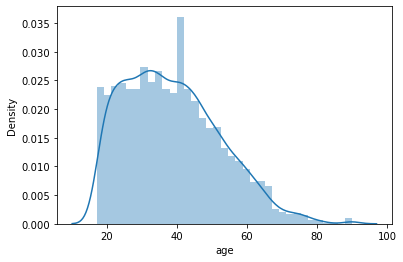

In [6]:
sns.distplot(df.age)

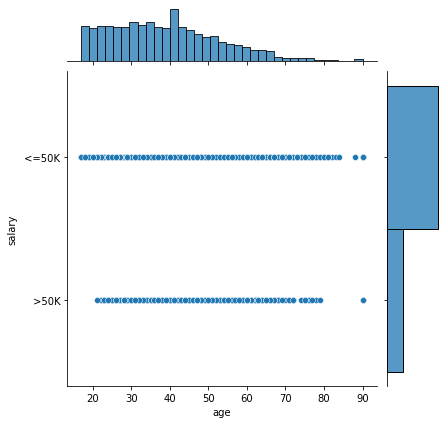

In [7]:
sns.jointplot(df.age,df.salary)

<AxesSubplot:xlabel='age'>

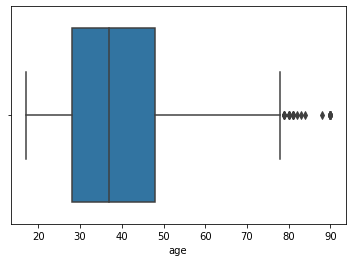

In [8]:
sns.boxplot(df.age)

In [9]:
df.workclass.value_counts()

 Private             4847
 Self-emp-not-inc     555
 Local-gov            449
 ?                    424
 State-gov            271
 Self-emp-inc         260
 Federal-gov          192
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64

In [10]:
df.workclass=df.workclass.apply(lambda x: x.strip())

(array([2.710e+02, 5.550e+02, 4.847e+03, 1.920e+02, 0.000e+00, 4.490e+02,
        4.240e+02, 2.600e+02, 1.000e+00, 1.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

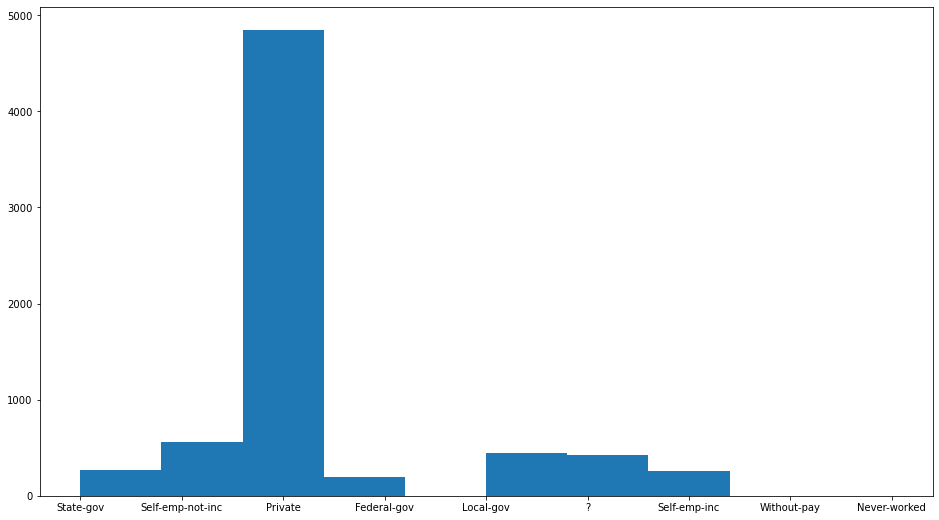

In [11]:
plt.figure(figsize=(16,9))
plt.hist(df.workclass)

In [12]:
df.education.value_counts()

 HS-grad         2260
 Some-college    1599
 Bachelors       1138
 Masters          376
 Assoc-voc        299
 11th             264
 Assoc-acdm       229
 10th             207
 7th-8th          140
 9th              117
 Prof-school      115
 Doctorate         77
 12th              77
 5th-6th           61
 1st-4th           32
 Preschool          9
Name: education, dtype: int64

In [13]:
df['education-num'].value_counts()

9     2260
10    1599
13    1138
14     376
11     299
7      264
12     229
6      207
4      140
5      117
15     115
16      77
8       77
3       61
2       32
1        9
Name: education-num, dtype: int64

In [14]:
df.drop('education',axis=1,inplace=True)

In [15]:
df.head(3)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [16]:
df['marital-status'].value_counts()

 Married-civ-spouse       3202
 Never-married            2306
 Divorced                  959
 Separated                 223
 Widowed                   208
 Married-spouse-absent      97
 Married-AF-spouse           5
Name: marital-status, dtype: int64

In [17]:
df.occupation.value_counts()

 Prof-specialty       883
 Craft-repair         871
 Exec-managerial      857
 Sales                831
 Adm-clerical         826
 Other-service        698
 ?                    425
 Machine-op-inspct    421
 Transport-moving     359
 Handlers-cleaners    267
 Farming-fishing      206
 Tech-support         196
 Protective-serv      131
 Priv-house-serv       27
 Armed-Forces           2
Name: occupation, dtype: int64

In [18]:
df.salary.value_counts()

 <=50K    5317
 >50K     1683
Name: salary, dtype: int64

In [19]:
X=df.drop('salary',axis=1)
y=df['salary']

In [20]:
X[:3]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


In [21]:
y[:3]

0     <=50K
1     <=50K
2     <=50K
Name: salary, dtype: object

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=40)

In [23]:
ohe=OneHotEncoder(drop='first',sparse=False)

In [24]:
X_train_ohe=ohe.fit_transform(X_train[['workclass','marital-status','occupation','relationship','race','sex','native-country']])

In [25]:
X_test_ohe=ohe.transform(X_test[['workclass','marital-status','occupation','relationship','race','sex','native-country']])

In [26]:
X_train.drop(['workclass','marital-status','occupation','relationship','race','sex','native-country'],axis=1,inplace=True)
X_test.drop(['workclass','marital-status','occupation','relationship','race','sex','native-country'],axis=1,inplace=True)

In [27]:
X_train_final=np.hstack((X_train,X_train_ohe))

In [28]:
X_test_final=np.hstack((X_test,X_test_ohe))

In [29]:
X_train_final

array([[5.20000e+01, 1.01752e+05, 1.10000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.10000e+01, 1.13544e+05, 1.40000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.90000e+01, 4.26001e+05, 9.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.70000e+01, 3.92320e+04, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.10000e+01, 1.76753e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.40000e+01, 1.73730e+05, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [30]:
X_test_final

array([[6.50000e+01, 3.38316e+05, 1.00000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.90000e+01, 3.43830e+04, 1.10000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.30000e+01, 1.88436e+05, 1.40000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [4.00000e+01, 1.20277e+05, 9.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.90000e+01, 6.13070e+04, 4.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.00000e+01, 1.81953e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [31]:
scaler=MinMaxScaler()

In [32]:
X_train_final=scaler.fit_transform(X_train_final)
X_test_final-scaler.transform(X_test_final)

array([[6.43424658e+01, 3.38315685e+05, 9.40000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.88356164e+01, 3.43829852e+04, 1.03333333e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.26438356e+01, 1.88435833e+05, 1.31333333e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.96849315e+01, 1.20276900e+05, 8.46666667e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.85616438e+01, 6.13069587e+04, 3.80000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.94109589e+01, 1.81952840e+05, 8.46666667e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [33]:
y_train.value_counts()

 <=50K    4215
 >50K     1385
Name: salary, dtype: int64

In [34]:
y_test.value_counts()

 <=50K    1102
 >50K      298
Name: salary, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [36]:
X_train_final,y_train=sm.fit_resample(X_train_final,y_train)
X_test_final,y_test=sm.fit_resample(X_test_final,y_test)

In [37]:
y_test.value_counts()

 <=50K    1102
 >50K     1102
Name: salary, dtype: int64

In [38]:
y_train.value_counts()

 <=50K    4215
 >50K     4215
Name: salary, dtype: int64

In [39]:
model_params={
    'Logistic Regression':{
        'model': LogisticRegression(),
        'params':{
            'C':[1,5,10],
            'penalty':['l1','l2']
        }
    },
    'SVC':{
        'model':SVC(),
        'params':{
            'kernel':['rbf','linear'],
            'gamma':['scale','auto']
        }
    },
    'Decision Tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy','log_loss']
        }
    },
    'Random Forest':{
        'model': RandomForestClassifier(),
        'params':{
            'criterion':['gini','entropy','log_loss'],
            'n_estimators':[50,100,150]
    }
},
    'KNN':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[5,7,9]
        }
    }
}

In [40]:
scores=[]
for m_n,m_p in model_params.items():
    classifier=GridSearchCV(m_p['model'],m_p['params'],cv=5,return_train_score=False)
    classifier.fit(X_train_final,y_train)
    scores.append({
        'model_name':m_n,
        'best_parameter':classifier.best_params_,
        'best_score':classifier.best_score_
    })

In [41]:
df=pd.DataFrame(scores,columns=['model_name','best_parameter','best_score'])

In [42]:
df

,model_name,best_parameter,best_score
0,Logistic Regression,"{'C': 10, 'penalty': 'l2'}",0.829419
1,SVC,"{'gamma': 'scale', 'kernel': 'rbf'}",0.821708
2,Decision Tree,{'criterion': 'gini'},0.845314
3,Random Forest,"{'criterion': 'gini', 'n_estimators': 150}",0.891578
4,KNN,{'n_neighbors': 5},0.833808


In [47]:
y_pred=classifier.predict(X_test_final)
y_pred[100:110]

array([' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [45]:
y_test[:3]

0     <=50K
1     <=50K
2     <=50K
Name: salary, dtype: object